<a href="https://colab.research.google.com/github/Keerthana-Sen/Feynn-Labs/blob/projects/predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('odisha.csv')
df.head()

,Indicator,Facility Type,Total,nil performance,Performance,Value Reported,District,Sub-district,Facility
0,Deliveries conducted at facility,DH,32,0,Maximum,1187,Mayurbhanj,Dist Level Facility,Baripada
1,Deliveries conducted at facility,DH,32,0,Minimum,146,Deogarh,Dist Level Facility,Deogarh
2,Deliveries conducted at facility,SDH,33,1,Maximum,347,Mayurbhanj,Dist Level Facility,Karanjia
3,Deliveries conducted at facility,SDH,33,1,Maximum,347,Nabarangapur,Umerkote,Umarkote
4,Deliveries conducted at facility,SDH,33,1,Minimum,28,Sonapur,Dist Level Facility,Birmaharajpur


<ipython-input-3-5270930762b9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='nil performance', y='Indicator', inner='stick', palette='Dark2')


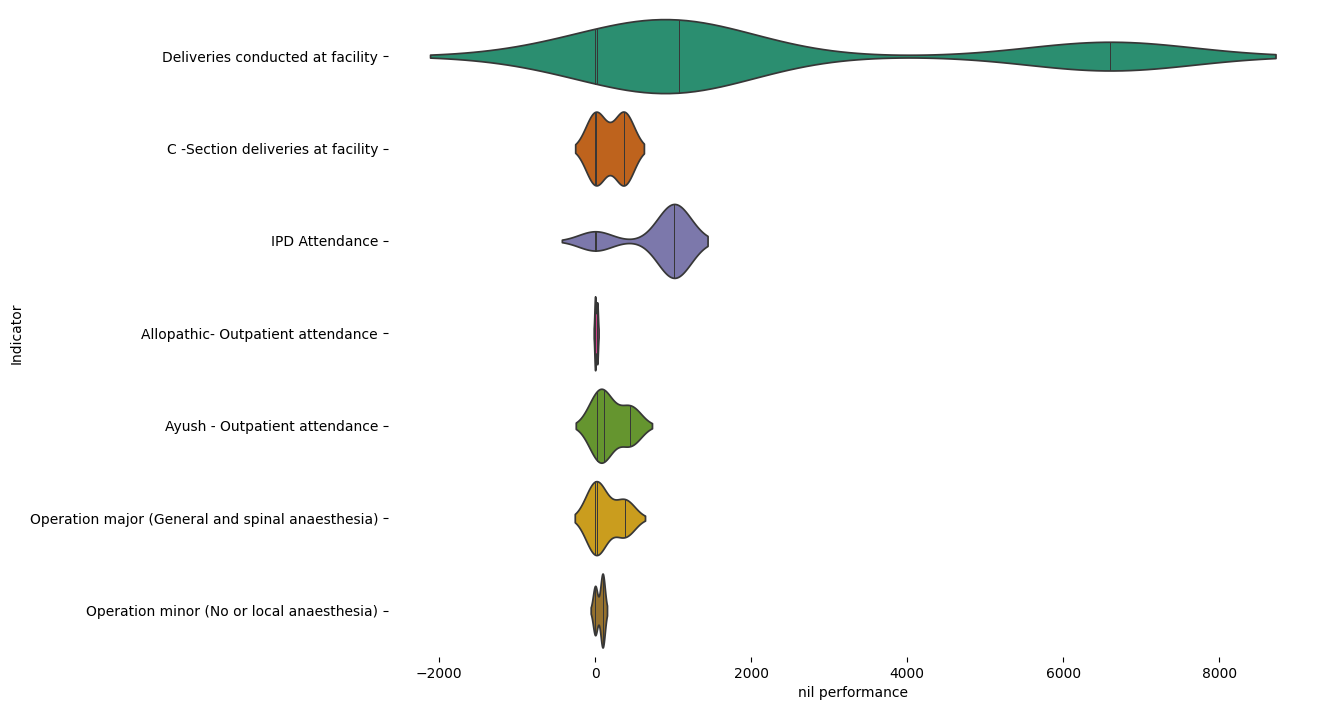

In [3]:
# @title Indicator vs nil performance

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Indicator'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='nil performance', y='Indicator', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Indicator        162 non-null    object
 1   Facility Type    162 non-null    object
 2   Total            162 non-null    int64 
 3   nil performance  162 non-null    int64 
 4   Performance      162 non-null    object
 5   Value Reported   162 non-null    int64 
 6   District         162 non-null    object
 7   Sub-district     162 non-null    object
 8   Facility         162 non-null    object
dtypes: int64(3), object(6)
memory usage: 11.5+ KB


In [15]:
X = df.drop(columns=['Indicator','Facility Type','nil performance','Sub-district','Facility'])
y= df[['Performance','District']]
print(X.head())

   Total  Performance  Value Reported  District
0     32            0            1187        21
1     32            1             146         7
2     33            0             347        21
3     33            0             347        22
4     33            1              28        28


In [16]:
print(y.head())

   Performance  District
0            0        21
1            1         7
2            0        21
3            0        22
4            1        28


In [17]:
columns_to_encode=['Indicator','Facility Type','Sub-district','Facility','Performance','District']
label_encoders={}
for column in columns_to_encode:
  label_encoders[column]=LabelEncoder()
  df[column]=label_encoders[column].fit_transform(df[column])
print(df.head())

   Indicator  Facility Type  Total  nil performance  Performance  \
0          3              1     32                0            0   
1          3              1     32                0            1   
2          3              4     33                1            0   
3          3              4     33                1            0   
4          3              4     33                1            1   

   Value Reported  District  Sub-district  Facility  
0            1187        21            24        11  
1             146         7            24        36  
2             347        21            24        73  
3             347        22            88       131  
4              28        28            24        20  


In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5, random_state=60)
print("\nShape of X_train:",X_train.shape)
print("\nShape of X_test:",X_test.shape)
print("\nShape of y_train:",y_train.shape)
print("\nShape of y_test:",y_test.shape)


Shape of X_train: (81, 4)

Shape of X_test: (81, 4)

Shape of y_train: (81, 2)

Shape of y_test: (81, 2)


In [19]:
print(X_train)

     Total  Performance  Value Reported  District
135     33            0             910        16
137    384            0            3950         2
39    1377            1               1        17
16    1377            1               1         0
114   1377            1               1        17
..     ...          ...             ...       ...
99     384            0            1589         2
143     33            0              31         3
138    384            1              40        23
70    6688            1               1         5
65    6688            1               1         0

[81 rows x 4 columns]


In [20]:
model=LinearRegression()
model.fit(X_train,y_train)
print("\nCoefficients of the trained model:\n", model.coef_)


Coefficients of the trained model:
 [[ 1.28732623e-16  1.00000000e+00  1.11022302e-16 -9.35666475e-17]
 [ 2.77337219e-18 -3.02470722e-15 -2.16840434e-19  1.00000000e+00]]


In [21]:
y_pred = model.predict(X_test)
print("\nPredicted Model:\n",y_pred)



Predicted Model:
 [[ 1.00000000e+00  1.60000000e+01]
 [ 1.00000000e+00  1.30000000e+01]
 [ 1.00000000e+00  1.31166708e-15]
 [ 1.00000000e+00  2.60000000e+01]
 [ 1.00000000e+00  1.90000000e+01]
 [ 1.17656617e-12  2.10000000e+01]
 [ 1.00000000e+00  2.10000000e+01]
 [ 1.00000000e+00  2.90000000e+01]
 [ 1.00000000e+00  1.30000000e+01]
 [ 1.00000000e+00  2.70000000e+01]
 [ 1.00000000e+00 -1.34168453e-14]
 [ 1.00000000e+00  2.10000000e+01]
 [ 1.00000000e+00  3.00000000e+00]
 [ 1.00000000e+00  8.00000000e+00]
 [ 1.00000000e+00  1.30000000e+01]
 [ 1.00000000e+00  2.00000000e+01]
 [ 1.00000000e+00  2.60000000e+01]
 [ 1.00000000e+00  2.90000000e+01]
 [ 1.00000000e+00  2.80000000e+01]
 [ 1.00000000e+00  3.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00]
 [ 1.00000000e+00  1.30000000e+01]
 [ 1.00000000e+00  1.10000000e+01]
 [ 1.00000000e+00  1.40000000e+01]
 [ 1.00000000e+00  1.30000000e+01]
 [ 1.00000000e+00  3.00000000e+00]
 [ 1.00000000e+00  1.90000000e+01]
 [ 1.00000000e+00  1.50000000e+01]
 

In [22]:
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error:", mse)



Mean Squared Error: 1.1626229306772248e-25


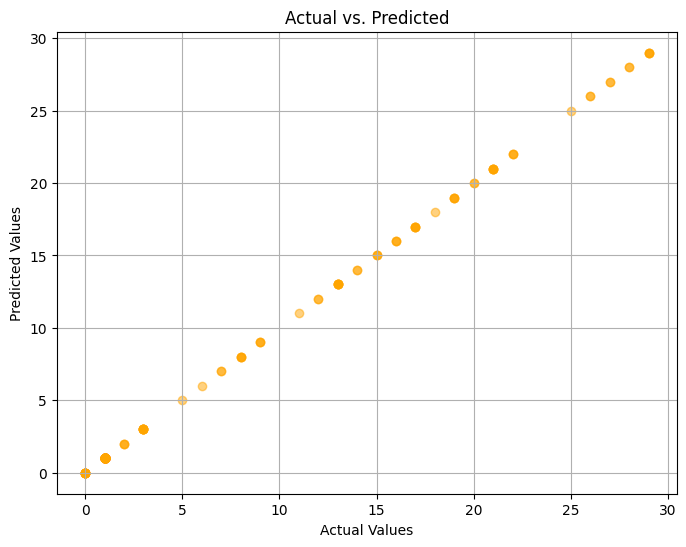

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.5)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [29]:
y_pred_test = model.predict(X_test)
matches = (y_pred_test == y_train)
if all(matches):
    print("All tested values match the training values.")
else:
    print("Some tested values do not match the training values.")

All tested values match the training values.


In [30]:
y_pred = model.predict(X_test)
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[ 1.28732623e-16  1.00000000e+00  1.11022302e-16 -9.35666475e-17]
 [ 2.77337219e-18 -3.02470722e-15 -2.16840434e-19  1.00000000e+00]]
Intercept: [ 2.16493490e-13 -1.42108547e-14]


In [31]:
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 1.0


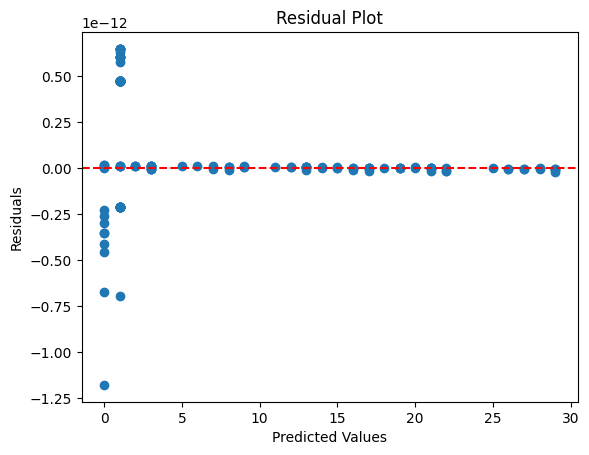

In [32]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [26]:
performance_values = df['Performance'].values[:5]
facility_values = df['Facility'].values[:5]
real_values= df['Value Reported'].values[:5]
district_values= df['District'].values[:5]
X_new = np.column_stack((performance_values, facility_values,real_values,district_values))
y_pred_new = model.predict(X_new)
for i, prediction in enumerate(y_pred_new):
    print(f"Predicted commercial growth potential for location {i+1}: {prediction}")

Predicted commercial growth potential for location 1: [11. 21.]
Predicted commercial growth potential for location 2: [36.  7.]
Predicted commercial growth potential for location 3: [73. 21.]
Predicted commercial growth potential for location 4: [131.  22.]
Predicted commercial growth potential for location 5: [20. 28.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
